<a href="https://colab.research.google.com/github/Siwan-SR/diabetes-detection/blob/main/diabetes-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Detection

#### Check if patient has diabetes or not

## Data

Data from: https://www.kaggle.com/datasets/mathchi/diabetes-data-set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("/content/drive/MyDrive/machine-learning-projects/diabetes-prediction/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(df)

768

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
model = GaussianNB()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7662337662337663

In [63]:
y_preds = model.predict(X_test)

In [30]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
    print(f"MSE: {mean_squared_error(y_test, y_preds)}")

In [31]:
model_report(y_test, y_preds)

Accuracy: 75.32%
Precision: 0.813953488372093
Recall: 0.5384615384615384
R2 Score: -0.01158167675021593
F1 Score: 0.6481481481481481
MAE: 0.24675324675324675
MSE: 0.24675324675324675


In [47]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.05126156, 0.18758829, 0.10713305, 0.10894796, 0.60875758,
       0.05346771, 0.10281792, 0.99864998, 0.0251834 , 0.09628797])

In [48]:
roc_auc_score(y_test, y_probs_positive)

0.8242005185825411

In [44]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "blue", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

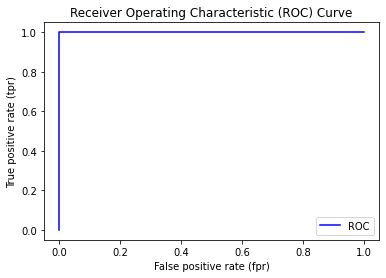

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [49]:
pd.crosstab(y_test, y_preds, rownames = ["Actual Label"], colnames = ["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,81,8
1,30,35


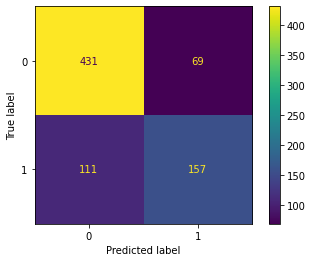

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X, y = y);